# Number of dataset

Train:  220k images  
Test:  57.5k images

## Labels

In [1]:
import pandas as pd

In [2]:
labels = pd.read_csv("/Users/haeinpark/Downloads/histopathologic-cancer-detection/train_labels.csv")

In [3]:
labels.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


Label is binary value and Non-tumor data is about 60%, and tumor data is about 40%

In [4]:
rate_df = labels.groupby(by='label').count()
rate_df['Prop'] = rate_df['id'] / rate_df['id'].sum() * 100
rate_df

,id,Prop
label,,
0,130908,59.496875
1,89117,40.503125


With unbalanced label, model can not train properly.  
So reduce some Non-tumor data to make eqaul number of labels  

In [5]:
new_label_list = []
new_label_list.append(labels[labels['label']==1])
new_label_list.append(labels[labels['label']==0].sample(len(labels[labels['label']==1])))
new_label = pd.concat(new_label_list)

In [6]:
new_label['label'].value_counts()

1    89117
0    89117
Name: label, dtype: int64

In [7]:
new_label.to_csv("/Users/haeinpark/Documents/GitHub/histopathologic-cancer-detection/train_labels_balance.csv", 
                 index=False)

## Images

In [8]:
from PIL import Image
import numpy as np

In [10]:
sample_image = Image.open('/Users/haeinpark/Downloads/histopathologic-cancer-detection/train/00001b2b5609af42ab0ab276dd4cd41c3e7745b5.tif')

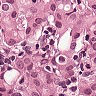

In [11]:
sample_image

In [12]:
sample_image_array = np.array(sample_image, dtype=np.float64)

Image is 96 X 96 shape and has 3 channels

In [13]:
sample_image_array.shape

(96, 96, 3)

Each channel's Max value is 255.   
we can normalize the image as divide each channel by 255 so that data range becomes 0 to 1.  
And then subtract 0.5 and divide by 0.5.  
Data range become -1 to 1.  

In [29]:
sample_image_array[0].min(), sample_image_array[0].max()

(0.0, 255.0)

In [30]:
sample_image_array[1].min(), sample_image_array[1].max()

(1.0, 255.0)

In [31]:
sample_image_array[2].min(), sample_image_array[2].max()

(0.0, 255.0)

### Normalize image

In [23]:
sample_image_array_norm = sample_image_array / 255.
sample_image_array_norm = sample_image_array_norm - 0.5
sample_image_array_norm = sample_image_array_norm / 0.5

In [24]:
sample_image_array_norm[0].min(), sample_image_array_norm[0].max()

(-1.0, 1.0)

In [25]:
sample_image_array_norm[1].min(), sample_image_array_norm[1].max()

(-0.9921568627450981, 1.0)

In [26]:
sample_image_array_norm[2].min(), sample_image_array_norm[2].max()

(-1.0, 1.0)

In [27]:
norm_image = Image.fromarray(sample_image_array_norm, 'RGB')

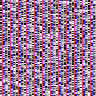

In [28]:
norm_image